## Covid-19 Detection using chest X-rays

[Download dataset ](https://www.kaggle.com/mr3suvhro/covid-19-xray-image-dataset-with-huge-samples?select=COVID )

### 1) Specifying file path for test and train directories

In [ ]:
#TRAIN_PATH='Path to training directory'
#TEST_PATH='Path to test directory'
class_names=["Covid Negative","Covid Positive"]

### 2) Importing required libraries 
##### libraries required for visualizations, augmentation and deep learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from PIL import Image
import os

import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 3) Loading in the dataset and performing augmentation
##### ImageDataGenerator - ImageDataGenerator generates batches of image data with real-time data augmentation
##### flow_from_directory - Takes the path to a directory & generates batches of augmented data 

In [ ]:
generator = image.ImageDataGenerator(rescale=1./255,      
      width_shift_range=0.2,   
      height_shift_range=0.2,  
      shear_range=0.2,                   
      horizontal_flip=True,    
      fill_mode="nearest",
      validation_split = 0.2)

train_datagen = generator.flow_from_directory("/content/drive/MyDrive/COVID/train",target_size=(150,150),class_mode='binary',subset ="training",batch_size=20, seed=42)
val_datagen = generator.flow_from_directory("/content/drive/MyDrive/COVID/train",target_size=(150,150),class_mode='binary',subset ="validation",batch_size=20, seed=42)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


### 4) Visualizing data and associated labels

7
Covid Negative


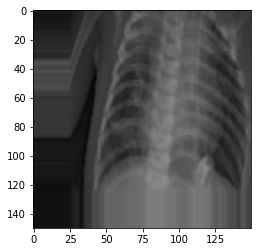

In [ ]:
i = int(input())
plt.imshow(train_datagen[0][0][i])
print(class_names[int(train_datagen[0][1][i])])

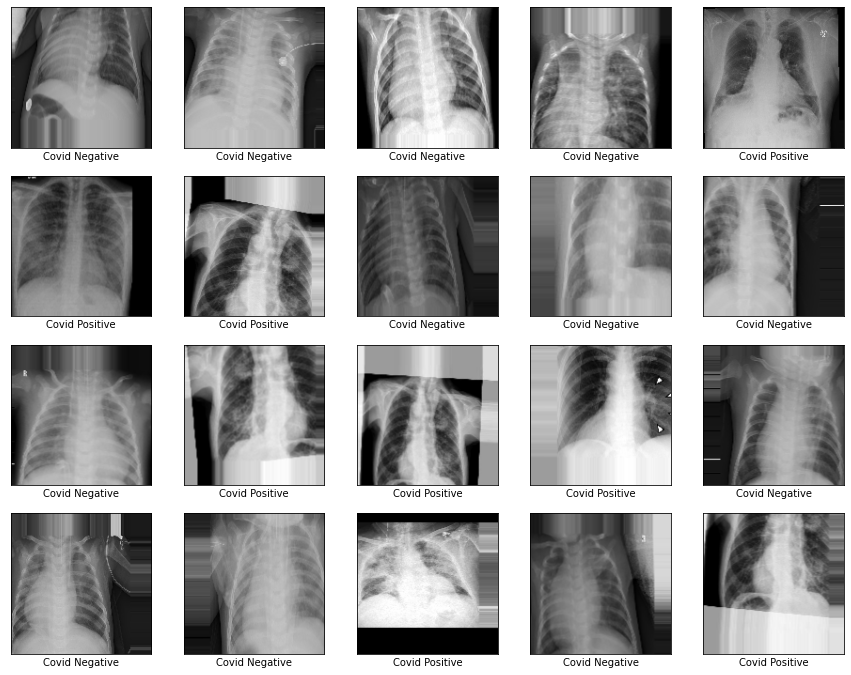

In [ ]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_datagen[0][0][i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_datagen[0][1][i])])
plt.show()

### 5) CNN sequential model
##### layered architechture 

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

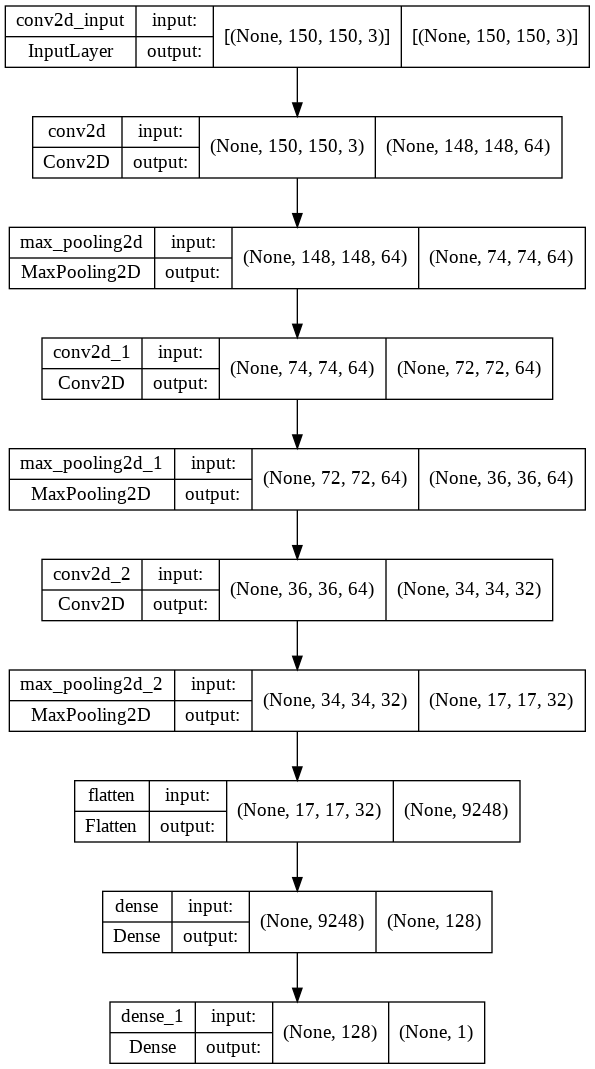

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

### 6) Model training followed by evaluation

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics = ['accuracy','Precision','Recall',])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_datagen,validation_data=val_datagen,epochs = 20)

Epoch 1/20
80/80 [==============================] - 39s 485ms/step - loss: 0.1781 - accuracy: 0.9356 - precision: 0.9497 - recall: 0.9200 - val_loss: 0.1978 - val_accuracy: 0.9300 - val_precision: 0.9433 - val_recall: 0.9150
Epoch 2/20
80/80 [==============================] - 39s 487ms/step - loss: 0.1493 - accuracy: 0.9469 - precision: 0.9577 - recall: 0.9350 - val_loss: 0.1889 - val_accuracy: 0.9300 - val_precision: 0.9135 - val_recall: 0.9500
Epoch 3/20
80/80 [==============================] - 38s 472ms/step - loss: 0.1644 - accuracy: 0.9438 - precision: 0.9494 - recall: 0.9375 - val_loss: 0.1280 - val_accuracy: 0.9500 - val_precision: 0.9737 - val_recall: 0.9250
Epoch 4/20
80/80 [==============================] - 37s 470ms/step - loss: 0.1372 - accuracy: 0.9519 - precision: 0.9547 - recall: 0.9488 - val_loss: 0.2521 - val_accuracy: 0.8925 - val_precision: 0.9876 - val_recall: 0.7950
Epoch 5/20
80/80 [==============================] - 37s 468ms/step - loss: 0.1311 - accuracy: 0.9519

### 7) Graphical representation of results of model

#### The learning rate controls how quickly the model is adapted to the problem. 

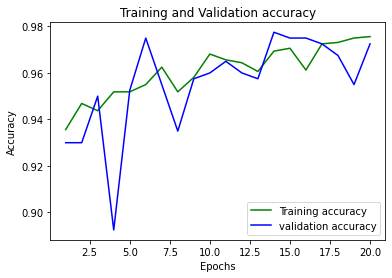

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

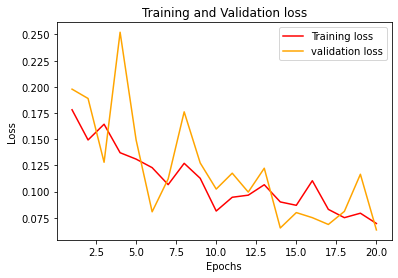

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

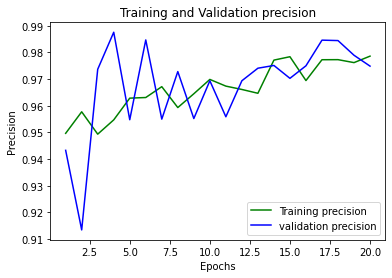

In [ ]:
precision= history.history['precision']
val_precision = history.history['val_precision']
epochs = range(1,21)
plt.plot(epochs, precision, 'g', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

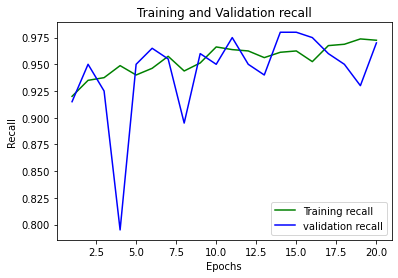

In [ ]:
recall = history.history['recall']
val_recall = history.history['val_recall']
epochs = range(1,21)
plt.plot(epochs, recall, 'g', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='validation recall')
plt.title('Training and Validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
test_generator = generator.flow_from_directory( "/content/drive/MyDrive/COVID/test",target_size=(150,150),class_mode='binary',batch_size=20, seed=42)

predictions=model.predict_generator(test_generator)
#pred
model.evaluate(test_generator) 

Found 328 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


17/17 [==============================] - 6s 362ms/step - loss: 0.0931 - accuracy: 0.9604 - precision: 0.9748 - recall: 0.9451


[0.09312096238136292,
 0.9603658318519592,
 0.9748427867889404,
 0.9451219439506531]

In [ ]:
model.save('my_model.h5')